In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_auc_score

In [55]:
data = pd.read_csv('C:/Users/hp/Downloads/train_jqd04QH.csv')

In [56]:
data.isnull().sum().sort_values(ascending=False)

company_type              5039
company_size              4779
gender                    4098
major_discipline          2838
education_level            457
last_new_job               367
enrolled_university        342
experience                  59
target                       0
training_hours               0
relevent_experience          0
city_development_index       0
city                         0
enrollee_id                  0
dtype: int64

In [57]:
data = data.drop(['enrollee_id','city_development_index'], axis = 1)

In [58]:
#Baseline Model
data['education_level'].value_counts()

Graduate          10769
Masters            4319
High School        2032
Phd                 459
Primary School      323
Name: education_level, dtype: int64

In [59]:
data_crosstab = pd.crosstab(data['company_type'], 
                            [data['last_new_job']],
                               margins = False) 
print(data_crosstab) 

last_new_job            1     2    3    4    >4  never
company_type                                          
Early Stage Startup   362    84   18   27    30     45
Funded Startup        622   198   63   56    71     18
NGO                   275    69   28   28   106     21
Other                  47    17    6    5    32      8
Public Sector         359   200   83   53   236     50
Pvt Ltd              3966  1688  667  686  2267    667


In [60]:
data['enrolled_university'].fillna(value = "no_enrollment", inplace = True)

In [61]:
for ind in data.index:    
    if pd.isnull(data['experience'][ind]):
        if data['enrolled_university'][ind] == "Full time course":
            data['experience'][ind] = "4"
        elif data['enrolled_university'][ind] == "Part time course":
            data['experience'][ind] = "5"
        else :
            data['experience'][ind] = ">20"
            

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


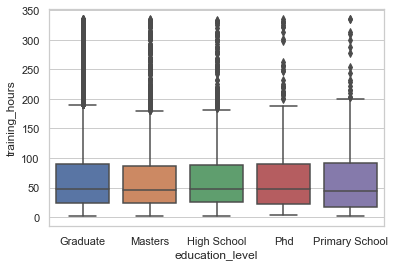

In [62]:
sns.set(style="whitegrid")
ax = sns.boxplot(x="education_level", y="training_hours", data=data)

In [63]:
for ind in data.index:    
    if pd.isnull(data['company_size'][ind]):  
        if data['company_type'][ind] == "Early Stage Startup" :
            data['company_size'][ind] = "<10"
        elif data['company_type'][ind] == "NGO":
            data['company_size'][ind] = " 100-500"
        elif data['company_type'][ind] == "Public Sector":
            data['company_size'][ind] = " 1000-4999"
        else :
            data['company_size'][ind] = " 50-99"

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is t

In [65]:
data['gender'].fillna(value = "Male", inplace = True)
data['major_discipline'].fillna(value = "STEM", inplace = True)
data['education_level'].fillna(value = "Graduate", inplace = True)
data['last_new_job'].fillna(value = 1, inplace = True)
data['company_type'].fillna(value = "Pvt Ltd", inplace = True)




In [66]:
data['company_size'] = data['company_size'].astype(str)
data['last_new_job'] = data['last_new_job'].astype(str)

In [67]:
data['last_new_job'] = data['last_new_job'].replace(">4","5")
data['company_size'] = data['company_size'].replace("<10","0")
data['company_size'] = data['company_size'].replace("10000+","10000")
data['experience'] = data['experience'].replace("<1","0")
data['experience'] = data['experience'].replace(">20","21")

In [68]:
label_encoder = preprocessing.LabelEncoder()
data['city']= label_encoder.fit_transform(data['city'])
data['gender']= label_encoder.fit_transform(data['gender'])
data['relevent_experience']= label_encoder.fit_transform(data['relevent_experience'])
data['enrolled_university']= label_encoder.fit_transform(data['enrolled_university'])
data['education_level']= label_encoder.fit_transform(data['education_level'])
data['major_discipline']= label_encoder.fit_transform(data['major_discipline'])
data['experience']= label_encoder.fit_transform(data['experience'])
data['company_size']= label_encoder.fit_transform(data['company_size'])
data['company_type']= label_encoder.fit_transform(data['company_type'])
data['last_new_job']= label_encoder.fit_transform(data['last_new_job'])

In [69]:
city_df=pd.get_dummies(data['city'],prefix='c',drop_first=True)
major_discipline_df=pd.get_dummies(data['major_discipline'],prefix='ma',drop_first=True)
company_type_df=pd.get_dummies(data['company_type'],prefix='ct',drop_first=True)
gender_df=pd.get_dummies(data['gender'],prefix='g',drop_first=True)
relevent_experience_df=pd.get_dummies(data['relevent_experience'],prefix='re',drop_first=True)
enrolled_university_df=pd.get_dummies(data['enrolled_university'],prefix='eu',drop_first=True)
education_level_df=pd.get_dummies(data['education_level'],prefix='el',drop_first=True)
experience_df=pd.get_dummies(data['experience'],prefix='e',drop_first=True)
company_size_df=pd.get_dummies(data['company_size'],prefix='cs',drop_first=True)
last_new_job_df=pd.get_dummies(data['last_new_job'],prefix='lnj',drop_first=True)

In [70]:
data=data.join(city_df)
data=data.join(major_discipline_df)
data=data.join(company_type_df)
data=data.join(gender_df)
data=data.join(last_new_job_df)
data=data.join(relevent_experience_df)
data=data.join(enrolled_university_df)
data=data.join(education_level_df)
data=data.join(experience_df)
data=data.join(company_size_df)

In [71]:
data = data.drop(['city','major_discipline','company_type','gender','relevent_experience','enrolled_university','company_size','education_level','experience','last_new_job'],axis=1)

In [72]:
y=data.target
x= data.drop('target',axis=1)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                        shuffle=True,
                                                        test_size=0.2, 
                                                        random_state=80)


In [74]:
classifier = LogisticRegression() 
classifier.fit(x, y) 


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [106]:
y_pred_train = classifier.predict_proba(X_train)
acc_log = roc_auc_score(y_train, y_pred_train[:,1])
acc_log


0.6843559433862395

In [108]:
Y_pred = classifier.predict_proba(X_test)
acc_log = roc_auc_score(y_test, Y_pred[:,1])
acc_log

0.6775535386822641

In [ ]:
data.info()

In [ ]:
### Testdata

In [78]:
testdata = data = pd.read_csv('C:/Users/hp/Downloads/test_KaymcHn.csv')

In [79]:
submission = pd.DataFrame()

In [80]:
submission['enrollee_id'] = testdata['enrollee_id']

In [81]:
testdata = testdata.drop(['enrollee_id','city_development_index'], axis = 1)

In [82]:
testdata['enrolled_university'].fillna(value = "no_enrollment", inplace = True)

In [83]:
for ind in testdata.index:    
    if pd.isnull(testdata['experience'][ind]):  
        if testdata['enrolled_university'][ind] == "Full time course":
            testdata['experience'][ind] = "4"
        elif testdata['enrolled_university'][ind] == "Part time course":
            testdata['experience'][ind] = "5"
        else :
            testdata['experience'][ind] = ">20"

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [84]:
for ind in testdata.index:    
    if pd.isnull(testdata['company_size'][ind]):  
        if testdata['company_type'][ind] == "Early Stage Startup" :
            testdata['company_size'][ind] = "<10"
        elif testdata['company_type'][ind] == "NGO":
            testdata['company_size'][ind] = " 100-500"
        elif testdata['company_type'][ind] == "Public Sector":
            testdata['company_size'][ind] = " 1000-4999"
        else :
            testdata['company_size'][ind] = " 50-99"


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is t

In [85]:
testdata['gender'].fillna(value = "Male", inplace = True)
testdata['major_discipline'].fillna(value = "STEM", inplace = True)
testdata['education_level'].fillna(value = "Graduate", inplace = True)
testdata['last_new_job'].fillna(value = 1, inplace = True)
testdata['company_type'].fillna(value = "Pvt Ltd", inplace = True)

In [86]:
testdata['company_size'] = testdata['company_size'].astype(str)
testdata['last_new_job'] = testdata['last_new_job'].astype(str)

In [87]:
testdata['last_new_job'] = testdata['last_new_job'].replace(">4","5")
testdata['company_size'] = testdata['company_size'].replace("<10","0")
testdata['company_size'] = testdata['company_size'].replace("10000+","10000")
testdata['experience'] = testdata['experience'].replace("<1","0")
testdata['experience'] = testdata['experience'].replace(">20","21")

In [88]:
label_encoder = preprocessing.LabelEncoder()
testdata['city']= label_encoder.fit_transform(testdata['city'])
testdata['gender']= label_encoder.fit_transform(testdata['gender'])
testdata['relevent_experience']= label_encoder.fit_transform(testdata['relevent_experience'])
testdata['enrolled_university']= label_encoder.fit_transform(testdata['enrolled_university'])
testdata['education_level']= label_encoder.fit_transform(testdata['education_level'])
testdata['major_discipline']= label_encoder.fit_transform(testdata['major_discipline'])
testdata['experience']= label_encoder.fit_transform(testdata['experience'])
testdata['company_size']= label_encoder.fit_transform(testdata['company_size'])
testdata['company_type']= label_encoder.fit_transform(testdata['company_type'])
testdata['last_new_job']= label_encoder.fit_transform(testdata['last_new_job'])

In [89]:
city_df=pd.get_dummies(testdata['city'],prefix='c',drop_first=True)
major_discipline_df=pd.get_dummies(testdata['major_discipline'],prefix='ma',drop_first=True)
company_type_df=pd.get_dummies(testdata['company_type'],prefix='ct',drop_first=True)
gender_df=pd.get_dummies(testdata['gender'],prefix='g',drop_first=True)
relevent_experience_df=pd.get_dummies(testdata['relevent_experience'],prefix='re',drop_first=True)
enrolled_university_df=pd.get_dummies(testdata['enrolled_university'],prefix='eu',drop_first=True)
education_level_df=pd.get_dummies(testdata['education_level'],prefix='el',drop_first=True)
experience_df=pd.get_dummies(testdata['experience'],prefix='e',drop_first=True)
company_size_df=pd.get_dummies(testdata['company_size'],prefix='cs',drop_first=True)
last_new_job_df=pd.get_dummies(testdata['last_new_job'],prefix='lnj',drop_first=True)


In [90]:
testdata=testdata.join(city_df)
testdata=testdata.join(major_discipline_df)
testdata=testdata.join(company_type_df)
testdata=testdata.join(gender_df)
testdata=testdata.join(last_new_job_df)
testdata=testdata.join(relevent_experience_df)
testdata=testdata.join(enrolled_university_df)
testdata=testdata.join(education_level_df)
testdata=testdata.join(experience_df)
testdata=testdata.join(company_size_df)

In [91]:
testdata = testdata.drop(['city','major_discipline','company_type','gender','relevent_experience','enrolled_university','company_size','education_level','experience','last_new_job'],axis=1)


In [102]:
y_pred1 = classifier.predict_proba(testdata)


In [103]:
y_pred1

array([[0.41553483, 0.58446517],
       [0.94230461, 0.05769539],
       [0.71727004, 0.28272996],
       ...,
       [0.93626604, 0.06373396],
       [0.77662699, 0.22337301],
       [0.59607887, 0.40392113]])

In [104]:
submission['target'] = pd.DataFrame(y_pred1[:,1])

In [105]:
submit = submission.to_csv("C:/Users/hp/Downloads/output19.csv",index = False)